# AST 502, Lecture 16: Classification

Samuel Wyatt

### Outline:
* Classification overview and motivation
* 9.2: Assigning Categories
    * Classification Loss
* 9.3: Generative Classification
    * General Conceptes
    * Naive Bayes
    * Gaussian Naive Bayes
    * Linear Discriminant Analysis and Relatives
    * More Flexible Density Models: Mixtures
* 9.8~: Small Comments on *Performance*


# Classification

### Unsupervised vs. Supervised Classification

   **Supervised**: Having predefined labels for these data points (e.g. an object is tall, short, red, or blue) and using a relationship between lablels and physical properties of a source.
   
   **Unsupervised**: Estimating joint probability distributions from multivariate data sets and identifying the inherent clustering within the properties of sources (chpt 6)


# Classification

### Motivations

The long history of classification in astronomy

Edwin Hubble's Classifcation of Galaxies

![](https://briankoberlein.com/wp-content/uploads/hubble-tune-fork-1.jpg)

# Classification Loss

The most common loss (cost) function in classification is *zero-one loss*, where a value is assigned of 1 for a misclassification and 0 for a correct classification.

$$L(y,\hat{y})=\sigma(y \ne \hat{y})$$

where $L(y,\hat{y})$ is the classification loss and $\hat{y}$ represents the best guess value of $y$. This means

\begin{align}
L(y,\hat{y} = \left\{ \begin{array}{cc} 
                1 & \hspace{5mm} y \ne \hat{y} \\
                0 & \hspace{5mm} otherwise \\
                \end{array} \right.
\end{align}

And the classification *risk* of a model is defined as 

$$ E[L(y,\hat{y}] = p(y \ne \hat{y}) $$

sometimes referred to as the probability of misclssification. (e.g. in regression the most common loss function is $L(y,\hat{y} = p(y - \hat{y})^{2}$

Another particularly common case of classification is that of a *detection*. Where a positive detection is labeled as 1 and nondetection is labeled as 0. There are two kinds of error: false positives and false negatives. From these *completeness* is defined as 

$$ \text{completeness} = \dfrac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$

and *contamination* as

$$ \text{contamination} = \dfrac{\text{false positives}}{\text{true positives} + \text{false negatives}}$$

Depending on the nature of the problem and the goal of the classification, we may wish to optimize one or the other.

# Generative Classification

### Bayes refresher

Given a set of **{x}** consisting of $N$ points in $D$ dimensions, such that $x_{i}^{j}$ is the *j*th feature of the *i*th point, and a set of descrete labels {y} draw from *K* classes, with values $y_{k}$, Bayes' Theorem describes the relation between the labels and features:

$$p(y_{k}|x_{i}) = \dfrac{p(x_i | y_k)p(y_k)}{\sum_i p(x_i | y_k)p(y_k)}$$

where $p(y_k)$ is the prior probability, and $p(x_i | y_k)$ is the probability distribution model

If we knew the full probability densities $p(\textbf{x}, y)$ it would be straightforward to estimate the classification likelihoods directly from the data

# General Concepts

### The Discriminant Function

We can relate classification to density estimation and regression.

$\hat{y} = f(y|x)$ represents the best guess of $y$ given $x$.  So classification can be thought of as the analog of regression where $y$ is a discrete *category* rather than a continuous variable, for example $y=\{0,1\}$.


In classification we refer to $f(y|x)$ as the [**discriminant function**](https://en.wikipedia.org/wiki/Discriminant_function_analysis).

For the simple 2-class example {0,1}:

$$\begin{eqnarray}
g(x) = f(y|x) & = &  \int y \, p(y|x) \, dy \\
%    & = & \int y p(y|x) \, dy \\
       & = & 1 \cdot p(y=1 | x) + 0 \cdot p(y=0 | x) = p(y=1 | x).
%     & = & p(y=1 | x)
\end{eqnarray}
$$

Thus from Bayes rule:

$$g(x) = \frac{p(x|y=1) \, p(y=1)}{p(x|y=1) \, p(y=1)  + p(x|y=0) \, p(y=0)}$$

# General Concepts

### Bayes Classifier

Making the discriminant function yield a binary prediction {0,1} is defined as giving the abstract template called a *Bayes Classifier*, which can be formulated as

$$\begin{eqnarray} \widehat{y} & = & \left\{ \begin{array}{cl}       	           1 & \mbox{if $g(x) > 1/2$}, \\       	           0 & \mbox{otherwise,}       	           \end{array}     	   \right. \\     & = & \left\{
\begin{array}{cl}               1 & \mbox{if $p(y=1|x) > p(y=0|x)$}, \\               0 & \mbox{otherwise.}               \end{array}       \right.\end{eqnarray}$$

Where this can be generalized to any number of classes, $k$, and not just two, since we can think of a $g_k(\textbf{x})$ for each class.

# General Concepts

### Decision Boundary

The *decision boundary* between two classes is the set of *x* values at which each class is equally likely

$$
p(x|y=1)p(y=1)  =  p(x|y=0)p(y=0);
$$

$$g_1(x) = g_2(x) \; {\rm or}\; g(x) = 1/2$$

This shows an example of the decision boundary for a simple model in one dimension, where the density for each class is modeled as a Gaussian.

![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_bayes_DB_1.png)


# Naive Bayes

In practice classification can be very complicated as the data are generally multi-dimensional (that is we don't just have $x$, we have $x_{j=0},x_1,x_2,x_3...x_n$, so we want $p(x_0,x_1,x_2,x_3...x_n|y)$.

However, if we **assume** that all attributes are conditionally independent (which is not always true, but is often close enough), then this simplifies to

$$ p(x_1,x_2|y_k) = p(x_1|y)p(x_2|y_k)$$
  
which can be written as

$$ p({x_{j=0},x_1,x_2,\ldots,x_N}|y_k) = \prod_j p(x_j|y_k).$$

From Bayes' rule and conditional independence we get

$$
  p(y_k | {x_0,x_1,\ldots,x_N}) =
  \frac{\prod_j p(x_j|y_k) p(y_k)}
       {\sum_l \prod_j p(x_j|y_l) p(y_l)}.
$$

We calculate the most likely value of $y$ by maximizing over $y_k$:

$$
\hat{y} = \arg \max_{y_k} \frac{\prod_j p(x_j|y_k) p(y_k)}
        {\sum_l \prod_j p(x_j|y_l) p(y_l)},
$$

From there the process is just estimating densities: $p(x|y=y_k)$ and $p(y=y_k)$ are learned from a set of training data, where
- $p(y=y_k)$ is just the frequency of the class $k$ in the training set
- $p(x|y=y_k)$ is just the density (probability) of an object with class $k$ having the attributes $x$

A catch is that if the training set does not cover the full parameter space, then  $p(x_i|y=y_k)$ can be $0$ for some value of $y_k$ and $x_i$.  The posterior probability is then $p(y_k|\{x_i\}) = 0/0$ which is a problem! A trick called [**Laplace smoothing**](https://en.wikipedia.org/wiki/Laplacian_smoothing) can be implemented to fix it.

# Gaussian Naive Bayes

One way to handle continuous values for $X$ is to model $p(x_i|y=y_k)$ as one-dimensional normal distributions, with means $\mu_{ik}$ and widths $\sigma_{ik}$. The naive Bayes estimator is then

$$\hat{y} = \arg\max_{y_k}\left[\ln p(y=y_k) - \frac{1}{2}\sum_{i=1}^N\left(2\pi(\sigma_{ik})^2 + \frac{(x_i - \mu_{ik})^2}{(\sigma_{ik})^2} \right) \right]$$

(the normalization constant has been omitted since it doesn't change the result of the maximization)

This estimator essentially assumes that the multivariate distribution $p(\textbf{x} | y_k)$ can be modeled using an axis-aligned multivariate Gaussian distribution.

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.naive_bayes import GaussianNB

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Simulate some data
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1

#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-1, 8)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
#fig = plt.figure(figsize=(5, 3.75))
#ax = fig.add_subplot(111)
#ax.scatter(X[:, 0], X[:, 1], c=y, zorder=2)

#ax.contour(xx, yy, Z, [0.5], colors='k')

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

#ax.set_xlabel('$x$')
#ax.set_ylabel('$y$')

#plt.show()


![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_simple_naivebayes_1.png)

A decision boundary computed of a simple data set using Gaussian naive Bayes classification. The line shows the decision boundary, which corresponds to the curve where a new point has equal posterior probability of being part of each class.


Since examples in real life are never this straight forward. Usually distributions will overlap and the definite decision boundary will not be as clear as the previous example.

Next the Bayes classification of RR Lyrae stars from the SDSS Stripe 82 will be demonstrated.

In [3]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
plt.clf()

from sklearn.naive_bayes import GaussianNB
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform Naive Bayes
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

order = np.array([1, 0, 2, 3])

for nc in Ncolors:
    clf = GaussianNB()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print "completeness", completeness
print "contamination", contamination

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 81),
                     np.linspace(ylim[0], ylim[1], 71))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# Plot completeness vs Ncolors
ax = plt.subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# Plot contamination vs Ncolors
ax = plt.subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

#plt.show()

completeness [ 0.48175182  0.68613139  0.81021898  0.87591241]
contamination [ 0.85201794  0.79295154  0.80143113  0.79020979]



![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_rrlyrae_naivebayes_1.png)

Here the Gaussian naive Bayes classification method is used to separate the variable RR Lyrae stars from the non variable main sequence stars. In the left panel, the light gray points show non-variable sources while the dark points show variable sources. The classification boundary is shown by the black line, and the classification probability is shown by the shaded background.

The right panel, the completeness and contamination as a function of the number of features used in the fit. With all four colors, naive Bayes attains a completeness of 0.876 and a contamination of 0.790

The "naive" refers to the fact that we are assuming that all of the variable are independent. If we relax that assumption and allow for covariances, then we have a Gaussian Bayes classifier. But note that this comes with a large jump in computational cost!

# Linear and Quadratic Discriminant Analysis

*Linear Discriminant Analysis* (LDA), like Gaussian naive Bayes, relies on some simplifying assumptions about the class distributions $p_k(\textbf{x})$. In particular it assumes that these distributions have identical covariances for all *K* classes which makes all classes a set of shifted Gaussians. The optimal classifier

$$g_k(\textbf{x}) = \textbf{x}^T\Omega^{-1}\mu_k-\dfrac{1}{2}\mu_k^T\Omega^{-1}+log\pi_k$$

where $\mu_k$ is the mean of class $k$, $\Omega$ is the covariance of the Gaussians, and $\pi_k$ is $p(y=y_k)$. If the class dependent covariances cancel out (assuming to be constant) then the Bayes classifier is linear with respect to **x**.

The discriminant boundary between classes is the line that minimizes the overlap between Gaussians

$$g_k(\textbf{x}) - g_l(\textbf{x}) =  \textbf{x}^T\Omega^{-1}(\mu_k - \mu_l) -\dfrac{1}{2}(\mu_k - \mu_l)^T\Omega^{-1}(\mu_k - \mu_l) + log\dfrac{\pi_k}{\pi_l}$$

In [4]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.lda import LDA

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform LDA
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = LDA()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print "completeness", completeness
print "contamination", contamination

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')

ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

#plt.show()

/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


completeness [ 0.48175182  0.67153285  0.67153285  0.67153285]
contamination [ 0.85300668  0.80590717  0.80467091  0.80590717]



![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_rrlyrae_lda_1.png)

Here the linear discriminant boundary for RR Lyrae stars with all four colors, LDA achieves a completeness of 0.672 and a contamination of 0.806

### QDA

If we were to relax the requirement that the convariances of the Gaussians are constant, the discriminant function for the classes become quadratic (*Quadratic Discriminant Analysis*)

$$g(\textbf{x}) = -\dfrac{1}{2}log|\Omega_k| - \dfrac{1}{2}(\textbf{x}-\mu_k)^T\Omega_{k}^{-1}(\textbf{x}-\mu_k) + log\pi_k
$$

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.qda import QDA

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform QDA
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = QDA()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

predictions = np.array(predictions)

completeness, contamination = completeness_contamination(predictions, y_test)

print "completeness", completeness
print "contamination", contamination

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', c='k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', c='k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')

ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

#plt.show()

/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


completeness [ 0.48175182  0.68613139  0.73722628  0.78832117]
contamination [ 0.85201794  0.79249448  0.77555556  0.75675676]



![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_rrlyrae_qda_1.png)

Here the quadratic discriminant boundary for RR Lyrae stars. With all four colors, QDA achieves a completeness of 0.788 and a contamination of 0.757

# More Flexible Density Models

The above classifications so far have made some restrictive assumptions: either that of conditional independence or that the distributions are Gaussian. However, a more flexible model might improve the completeness and efficiency of the classification. For that we can look to the techniques from Chapter 6.

The natural extension of the Gaussian assumptions is to use Gaussian Mixture Models (GMMs) to determine the density distribution, i.e., a GMM Bayes Classifier. Each of the components may be constrained to a simple case (such as diagonal-covariance-only Gaussians etc) to ease the computational cost of model fitting.

Note that the number of Gaussian components,  KK , must be chosen for each class,  kk , independently.

astroML implements GMM Bayes classification as:

In [6]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.classification import GMMBayes
from astroML.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results

# GMM-bayes takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X = X[::10]
#y = y[::10]

(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)
N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform GMM Bayes
Ncolors = np.arange(1, X.shape[1] + 1)
Ncomp = [1, 3]


@pickle_results('GMMbayes_rrlyrae.pkl')
def compute_GMMbayes(Ncolors, Ncomp):
    classifiers = []
    predictions = []

    for ncm in Ncomp:
        classifiers.append([])
        predictions.append([])
        for nc in Ncolors:
            clf = GMMBayes(ncm, min_covar=1E-5, covariance_type='full')
            clf.fit(X_train[:, :nc], y_train)
            y_pred = clf.predict(X_test[:, :nc])

            classifiers[-1].append(clf)
            predictions[-1].append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_GMMbayes(Ncolors, Ncomp)

completeness, contamination = completeness_contamination(predictions, y_test)

print "completeness", completeness
print "contamination", contamination

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, completeness[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, contamination[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.78))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

#plt.show()

@pickle_results: computing results and saving to 'GMMbayes_rrlyrae.pkl'


/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages

/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages

/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages

/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages

completeness [[ 0.48175182  0.68613139  0.73722628  0.76642336]
 [ 0.          0.17518248  0.40145985  0.68613139]]
contamination [[ 0.85201794  0.79249448  0.77654867  0.76190476]
 [ 0.          0.25        0.15384615  0.23577236]]


/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)



![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_rrlyrae_GMMbayes_1.png)

Gaussian mixture Bayes classifier for RR Lyrae stars. Here the left panel shows the decision boundary for the three-component model, and the right panel shows the completeness and contamination for both a one-component and three-component mixture model. With all four colors and a three-component model, GMM Bayes achieves a completeness of 0.686 and a contamination of 0.236.

The results with one component are simlar to those of naive bayes. The difference is that here the Gaussian fits to the densities are allowed to have arbitrary covariances between dimensions. Moving the a density model with 3 components the contamination is decreased with only a small effect on completeness.

## Comparing the performance of classifiers

So, "best" performance is a bit of a subjective topic. We trade contamination as a function of completeness and this is science dependent.  

The way that we will do this is with a [**Receiver Operating Characteristic (ROC)**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve. A ROC curve simply plots the true-positive vs. the false-positive rate.  

One concern about ROC curves is that they are sensitive to the relative sample sizes.  If there are many more background events than source events small false positive results can dominate a signal. For these cases we can plot efficiency (1 - contamination) vs. completeness.

/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/samuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

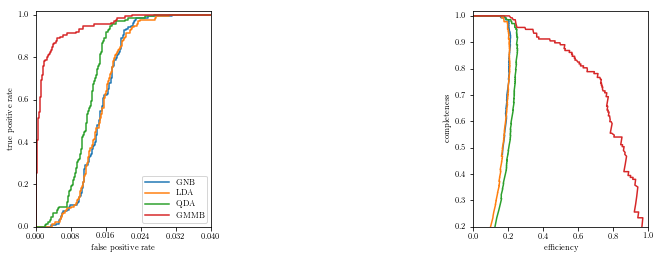

In [7]:
%matplotlib inline

# Ivezic, Figure 9.17
# Author: Jake VanderPlas
# License: BSD
import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
#from sklearn.lda import LDA
#from sklearn.qda import QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from astroML.classification import GMMBayes

from sklearn.metrics import precision_recall_curve, roc_curve

from astroML.utils import split_samples, completeness_contamination
from astroML.datasets import fetch_rrlyrae_combined

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
y = y.astype(int)
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25], random_state=0)

#------------------------------------------------------------
# Fit all the models to the training data
def compute_models(*args):
    names = []
    probs = []
    for classifier, kwargs in args:
        clf = classifier(**kwargs)
        clf.fit(X_train, y_train)
        y_probs = clf.predict_proba(X_test)[:, 1]

        names.append(classifier.__name__)
        probs.append(y_probs)

    return names, probs

names, probs = compute_models((GaussianNB, {}),
                              (LinearDiscriminantAnalysis, {}),
                              (QuadraticDiscriminantAnalysis, {}),
                              (GMMBayes, dict(n_components=3, min_covar=1E-5,
                                              covariance_type='full')))

#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax1 will show roc curves
ax1 = plt.subplot(131)

# ax2 will show precision/recall

# ax3 will show completeness/efficiency
ax3 = plt.subplot(133)

labels = dict(GaussianNB='GNB',
              LinearDiscriminantAnalysis='LDA',
              QuadraticDiscriminantAnalysis='QDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GMMBayes='GMMB',
              LogisticRegression='LR')

thresholds = np.linspace(0, 1, 1001)[:-1]

# iterate through and show results
for name, y_prob in zip(names, probs):
    # Note that these take y_prob and not y_pred
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    precision, recall, thresh2 = precision_recall_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])
    precision = np.concatenate([[0], precision])
    recall = np.concatenate([[1], recall])

    ax1.plot(fpr, tpr, label=labels[name])
    
    # Whereas this does take y_pred, which we need to compute
    # by looping through all possible probability thresholds
    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax3.plot(1-cont, comp, label=labels[name])

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax3.set_xlabel('efficiency')
ax3.set_ylabel('completeness')
ax3.set_xlim(0, 1.0)
ax3.set_ylim(0.2, 1.02)

plt.show()

Here we see that to get higher completeness, you could actually suffer significantly in terms of efficiency, but your FPR might not go up that much if there are lots of true negatives.

Generally speaking, you want to chose a decision boundary that maximizes the area under the curve.